# Clasificación binaria con scikit-learn

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## Análisis del dataset Iris

```scikit-learn``` incorpora unos [datasets de ejemplo](https://scikit-learn.org/stable/datasets/toy_dataset.html) que podemos utilizar para probar nuestros modelos. En este caso vamos a utilizar el dataset de flores [Iris](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py). Este dataset contiene 150 muestras de 3 especies diferentes de flores del [género Iris](https://es.wikipedia.org/wiki/Iris_(planta)) (50 muestras por especie) clasificadas. Para cada muestra se han tomado las medidas de longitud y anchura del sépalo y del pétalo. Tenemos por tanto 4 **características o *features*** (longitud y anchura del sépalo y del pétalo) y la clase (especie de la flor).


In [62]:
from sklearn.datasets import load_iris
iris = load_iris()


Estos datasets son objetos de tipo ```Bunch``` que contienen los datos y la información de las variables.
Podemos ver la descripción del dataset con el atributo ```DESCR``` y los nombres de las características con el atributo ```feature_names```.

In [63]:
print(type(iris)) # Tipo de objeto

<class 'sklearn.utils._bunch.Bunch'>


In [64]:
print(iris.DESCR) # Información del dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

El atributo ```iris.target``` contiene las **etiquetas de las muestras**. En este caso son números enteros que representan las clases de las flores (0, 1 o 2). Para saber qué clase representa cada número podemos consultar el atributo ```target_names```.

In [65]:
print(type(iris.target)) # Clases de las flores
print(iris.target_names) # Nombre de las clases
iris.target # Clases de las flores

<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Por tanto, tenemos etiquetada cada muestra con la clase a la que pertenece (0 para setosa, 1 para versicolor y 2 para virginica).

El atributo ```data``` contiene los **datos de las muestras**. Cada muestra es un array de 4 elementos que representan las medidas de longitud y anchura del sépalo y del pétalo. Podemos saber qué característica representan cada elemento del array consultando el atributo ```feature_names```.

In [66]:
print(iris.feature_names) # Datos de las flores
iris.data # Datos de las flores

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Recapitulando:
- ```iris.data``` es ndarray bidimensional, donde cada fila contiene la 4 características de cada muestra en un vector de 4 elementos. Estos elementos son respectivamente la longitud del sépalo, la anchura del sépalo, la longitud del pétalo y la anchura del pétalo, todo ello en centímetros, según nos indica el atributo ```feature_names```.
- ```iris.target``` es un array unidimensional que contiene la clase de cada muestra. Cada clase es un número entero que representa una especie de flor: 0 para setosa, 1 para versicolor y 2 para virginica, según nos indica el atributo ```target_names```.

Sabiendo esto podemos, por ejemplo, mostrar cómo se [clasifican los datos según la longitud y anchura del sépalo](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#scatter-plot-of-the-iris-dataset):

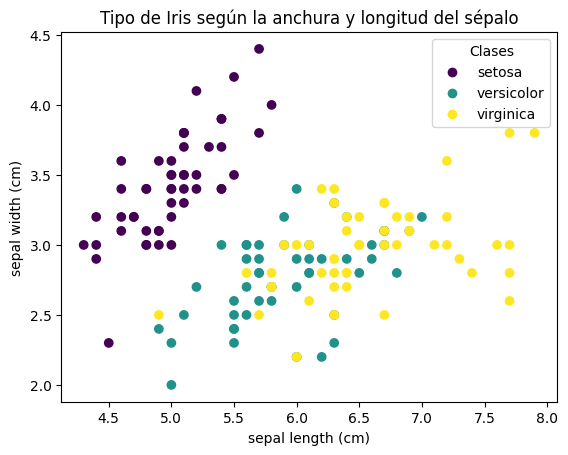

In [67]:
scatter = plt.scatter(
    iris.data[:, 0],   # Longitud del sépalo en el eje X (array de elementos de la columna 0)
    iris.data[:, 1],   # Ancho del sépalo en el eje Y
    c=iris.target)     # Color en función de las clases de las flores

plt.xlabel(iris.feature_names[0])   # Nombre del eje X
plt.ylabel(iris.feature_names[1])   # Nombre del eje Y
plt.legend(scatter.legend_elements()[0], iris.target_names, title="Clases")
plt.title("Tipo de Iris según la anchura y longitud del sépalo")
plt.show()

## Modelo de clasificación binaria

TODO: continuar este notebook completando:
- Crea un modelo para clasificar si una flor es de tipo virgínica (```iris.target == 2```) o no lo es (**clasificación binaria**) solo en función de la longitud del pétalo (columna 2 de ```iris.data```).
- Representa gráficamente el modelo y los datos de entrenamiento con ```matplotlib```.
- Calcula y representa cuál sería la predicción del modelo de que una flor con longitud de pétalo de 5 cm sea de tipo virgínica.

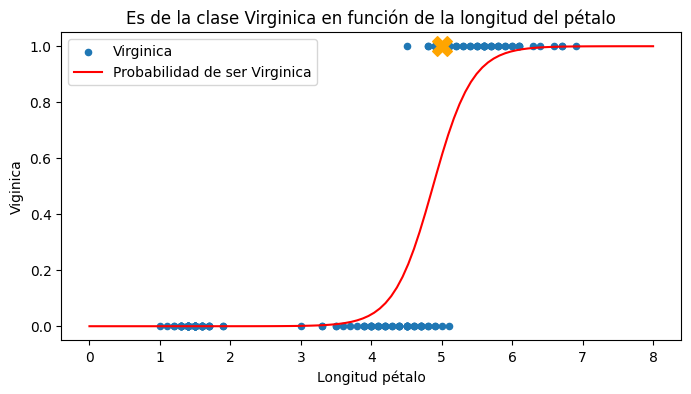

In [83]:
# Se importa Pandas
import pandas as pd

# El conjunto de datos ya se cargó previamente (iris = load_iris())

#Se convierte a dataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Se agrega una nueva columna donde se indica con un 1 o un 0 si la flor es Virginica.
df['esVirginica'] = (iris.target == 2).astype(int) # (iris.target == 2) devuelve una serie de booleanos; astype(int) convierte los booleanos a 0 (false) o 1 (true)

# Se crea el modelo
modeloViginica = LogisticRegression().fit(df[["petal length (cm)"]], df['esVirginica']) #Se entrena el modelo con los datos que ya tenemos, fit() es el entrenador, recibe la variable o
#variables indepnedientes (df[["petal length (cm)"]]) y la variable dependiente que ya conocemos (df['esVirginica']), Así después se puede predecir en base a la variable independiente
#el valor de la variable dependiente

df.plot(kind='scatter', # Crear un diagrama de dispersión (scatter)
        x='petal length (cm)',       # largo del pétalo en el eje x
        xlabel='Longitud pétalo',
        y='esVirginica',    # Es (1) o no es (0) Virginica en el eje y
        ylabel='Viginica',
        figsize=(8, 4),  # Reduzca el tamaño vertical ya que solo hay dos valores en el eje y
        title='Es de la clase Virginica en función de la longitud del pétalo', 
        label="Virginica")
x_sigmoide = np.linspace(0, 8, 1000) # Array de 1000 valores entre 0 y 8 para sacar una curva mona
df_sigmoide = pd.DataFrame({'petal length (cm)': x_sigmoide}) # Creamos un nuevo DataFrame con los valores de los pétalos de la curva
y_sigmoide = modeloViginica.predict_proba(df_sigmoide[['petal length (cm)']]) # Calculamos los valores de y para esos pétalos
plt.plot(x_sigmoide, y_sigmoide[:, 1], 'r-', label='Probabilidad de ser Virginica')
petalos = pd.DataFrame({'petal length (cm)': [5]}) # Creamos un nuevo DataFrame con los pétalos a comprobar, en este caso sólo uno, el cinco
plt.scatter(petalos, modeloViginica.predict(petalos), color='orange', marker='X', s=200) # Se crea el diagrama
plt.legend() # Se agrega la leyenda
plt.show() #Se muestra